# Economic and Environmental Vulnerability Index (EVI) Analysis: A simple visualization for world risk distribution condition

The Economic and Environmental Vulnerability Index (EVI) is a crucial tool utilized to evaluate the susceptibility of countries to a myriad of economic and environmental risks and shocks. It offers a holistic framework for comprehending the vulnerability of economies to diverse stressors, ranging from economic downturns and natural disasters to climate change impacts and environmental degradation. By incorporating multiple indicators, such as economic stability, environmental sustainability, social resilience, and adaptive capacity, the EVI enables policymakers, researchers, and stakeholders to identify regions that are particularly vulnerable to external pressures and prioritize resources for mitigation and adaptation strategies.

EVI is composed of 8 assessment of both economic and environmental dimensions of indicators:

Economic side:Share of agriculture, forestry and fisheries; Remoteness and landlockedness; Export concentration; Export instability.

Environmental side:Share of population living in low elevated coastal zones; Share of population living in drylands; Agricultural instability; Victims of disasters (%).

In this study, we aim to explore the global distribution of economic and environmental vulnerability using the EVI. By visualizing the EVI scores of different countries on a world map, we seek to answer the research question: What is the spatial pattern of economic and environmental vulnerability across the globe? Through this analysis, we endeavor to uncover geographical hotspots of vulnerability, identify potential correlations between vulnerability and socio-economic factors, and (maybe) ultimately inform targeted interventions and policy interventions to enhance resilience and sustainability worldwide.


## Importing Required Libraries

In [204]:
!pip install chart-studio
!pip install pandas
!pip install geopandas
!pip install basemap
!pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata


In [205]:
# Call required libraries
import time                   # To time processes
import warnings               # To suppress warnings
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt  # For graphics
import seaborn as sns           
import plotly.graph_objs as go
import chart_studio.plotly as py # For World Map
import plotly.express as px
import missingno as msno
import plotly.offline as py
import geopandas as gpd
from tabulate import tabulate
from mpl_toolkits.basemap import Basemap
from plotly.subplots import make_subplots

## Importing the Data

Importing the Excel file download from the UN-DESA database for economic and social affairs. This is a multi-sheet Excel file with inclusively brings several economic indicators together from different dimensions for consideration, like the human capital assessment indicator for Human Asset Indicator (HAI), and the Economic and Environmental Vulnerability Index (EVI) to assess a totally 8 aspects of the society risk factors and degree.

In this section for the mini-project, I only use the EVI part for world risk analysis from both the geographical side and the industry/social factors' sides.

Database URL: https://www.un.org/development/desa/dpad/least-developed-country-category/ldc-data-retrieval.html

In [85]:
import pandas as pd

# First, find this file on my PC
file_path = "Downloads/python_course/Mini_Project/LDC_Dimension_Indicators.xlsx"

# Read the Excel file into a dictionary of a Dateframe, with sheet names as keys(Apart from the "Read me" one, only take the- 
# -triennal review data set from 2024 back to 2000.
LDC_indicators = pd.read_excel(file_path)
# Access each data set/sheet:
df_2024 = excel_data['2024']
df_2021 = excel_data['2021']
df_2018 = excel_data['2018']
df_2015 = excel_data['2015']
df_2012 = excel_data['2012']
df_2009 = excel_data['2009']
df_2006 = excel_data['2006']
df_2003 = excel_data['2003']
df_2000 = excel_data['2000']

In [86]:
# Print on df for example
print(df_2000)

     Ccode ISO - 3                                Countrry/Indicators Status  \
0      NaN     NaN                                                NaN    NaN   
1      4.0     AFG                                        Afghanistan    LDC   
2     12.0     DZA                                            Algeria    NaN   
3     24.0     AGO                                             Angola    LDC   
4     28.0     ATG                                Antigua and Barbuda    NaN   
..     ...     ...                                                ...    ...   
149    NaN      18  United Nations Educational, Scientific and Cul...    NaN   
150    NaN      19                               Data refers to 1990.    NaN   
151    NaN      20                               Data refers to 1992.    NaN   
152    NaN      21                               Data refers to 1993.    NaN   
153    NaN      22  World Bank, World Development Indicators datab...    NaN   

           EVI   1  Population Unnamed:

## Exploratory Data Analysis

In [87]:
# Check the Dataframe, including the indicator names and the first several rows condition
# Take 2024 data as an example
df_2024.head()

CCODE ISO -3  Countries\Indicators Status        EVI   a  \
0    NaN     NaN                  NaN    NaN        NaN NaN   
1    4.0     AFG          Afghanistan    LDC  46.818023 NaN   
2   12.0     DZA              Algeria    ODC  25.216411 NaN   
3   24.0     AGO               Angola    LDC  38.465876 NaN   
4   28.0     ATG  Antigua and Barbuda    ODC  36.411573 NaN   

   Economic vulnerability index   b  \
0                           NaN NaN   
1                     49.438979 NaN   
2                     19.296841 NaN   
3                     43.730623 NaN   
4                     44.192880 NaN   

  Share of agriculture, forestry and fisheries Unnamed: 9  ...  Unnamed: 51  \
0                                        Value    Max-min  ...      Max-min   
1                                    34.097144  56.096855  ...    23.638412   
2                                     13.41404  21.040746  ...    68.511111   
3                                     11.72088  18.170983  ...    29.422222   
4                                     2.241699   2.104575  ...          100   

     r Adult literacy rate Unnamed: 54    s  \
0  NaN               Value     Max-min  NaN   
1   r1           37.266041   16.354721  NaN   
2  NaN           81.407837   75.210449  NaN   
3  NaN           72.400002   63.200002  NaN   
4   r2           98.949997   98.599996   s1   

  Gender parity index for lower secondary education completion Unnamed: 57  \
0                                              Value               Max-min   
1                                            0.55995             26.658332   
2                                           1.351509                   100   
3                                           0.838739             73.123116   
4                                           0.972885             95.480784   

     t GNI per capita ($)   u  
0  NaN                NaN NaN  
1   t1         436.955661 NaN  
2  NaN        3735.048424 NaN  
3  NaN        2026.984108 NaN  
4   t2       16463.122597 NaN  

[5 rows x 61 columns]

In [88]:
# Also take the 2021 and 2018 data frame as examples to check if there are some differences
df_2021.head()

CCODE ISO -3  Countries\Indicators Status        EVI   a  \
0    NaN     NaN                  NaN    NaN        NaN NaN   
1    4.0     AFG          Afghanistan    LDC  44.838924 NaN   
2   12.0     DZA              Algeria    NaN  30.770641 NaN   
3   24.0     AGO               Angola    LDC  45.579543 NaN   
4   28.0     ATG  Antigua and Barbuda    NaN  31.276921 NaN   

   Economic vulnerability index   b  \
0                           NaN NaN   
1                     37.085678 NaN   
2                     17.050202 NaN   
3                     45.541348 NaN   
4                     26.762197 NaN   

  Share of agriculture, forestry and fisheries Unnamed: 9  ...  Unnamed: 51  \
0                                        Value    Max-min  ...      Max-min   
1                                     25.84205  42.105169  ...    50.472456   
2                                    12.463514  19.429685  ...    96.914077   
3                                     9.432452  14.292292  ...    45.190533   
4                                     1.984044   1.667871  ...          100   

     r Literacy rate Unnamed: 54    s  \
0  NaN         Value     Max-min  NaN   
1  NaN      43.01972   24.026293   s1   
2   r1      81.40784   75.210453   s1   
3  NaN      66.03011   54.706813   s2   
4  NaN         98.95        98.6  NaN   

  Gender parity index for gross secondary school enrolment Unnamed: 57    t  \
0                                              Value           Max-min  NaN   
1                                            0.57098         28.496667  NaN   
2                                           1.222222               100   t1   
3                                            0.64334         40.556667  NaN   
4                                            0.96286             93.81  NaN   

  GNI per capita ($)   u  
0                NaN NaN  
1         512.512990 NaN  
2        3997.062551 NaN  
3        3207.259882 NaN  
4       16072.130129 NaN  

[5 rows x 61 columns]

In [89]:
df_2018.head()

CCODE ISO -3  Countries\Indicators Status        EVI   a  Exposure index  \
0    NaN     NaN                  NaN    NaN        NaN NaN             NaN   
1    4.0     AFG          Afghanistan    LDC  39.318475 NaN       25.226480   
2   12.0     DZA              Algeria    NaN  14.657090 NaN       11.981884   
3   24.0     AGO               Angola    LDC  36.757499 NaN       35.227313   
4   28.0     ATG  Antigua and Barbuda    NaN  38.555135 NaN       53.095001   

    b Population Unnamed: 9  ...  Education index   s Literacy rate  \
0 NaN      Value    Max-min  ...              NaN NaN         Value   
1 NaN   34656032   16.29731  ...        29.852086 NaN      31.74112   
2 NaN   40606052  13.860548  ...        83.346361 NaN      75.13605   
3 NaN   28813463  19.136757  ...        37.852696 NaN      66.03011   
4 NaN     100963        100  ...        99.300000 NaN         98.95   

  Unnamed: 55    t Gross secondary enrolment ratio Unnamed: 58    u  \
0     Max-min  NaN                           Value     Max-min  NaN   
1     8.98816   t1                        55.64441   50.716011  NaN   
2   66.848067  t26                        99.86019   99.844656   u1   
3   54.706813  NaN                        28.89872   20.998578   u1   
4        98.6   t2                       102.70546         100  NaN   

   GNI per capita ($)   v  
0                 NaN NaN  
1          632.654238 NaN  
2         4901.557109 NaN  
3         4476.876507 NaN  
4        12903.161689 NaN  

[5 rows x 62 columns]

In [90]:
df_2015.head()

CCODE ISO -3  Countries\Indicators Status        EVI   1  Exposure index  \
0    NaN     NaN                  NaN    NaN        NaN NaN             NaN   
1    4.0     AFG          Afghanistan    LDC  35.109918 NaN       25.381772   
2   12.0     DZA              Algeria    NaN  14.748572 NaN       12.345517   
3   24.0     AGO               Angola    LDC  39.734350 NaN       36.609036   
4   28.0     ATG  Antigua and Barbuda    NaN  40.429720 NaN       51.947509   

    2 Population Unnamed: 9  ...  Unnamed: 45  38 Literacy rate Unnamed: 48  \
0 NaN      Value    Max-min  ...      Max-min NaN         Value     Max-min   
1 NaN   30551674  18.235893  ...    47.090909 NaN      31.74112     8.98816   
2 NaN   39208194  14.399302  ...    90.787879 NaN      72.64868   63.531573   
3 NaN   21471618  23.659944  ...     4.606061 NaN      70.58037   60.773827   
4 NaN      89985        100  ...          100 NaN         98.95        98.6   

    39 Gross secondary enrolment ratio Unnamed: 51   55  GNI per capita ($)  \
0  NaN                           Value     Max-min  NaN                 NaN   
1  NaN                        54.31084   49.234267  NaN          672.097294   
2   40                        97.60729   97.341433  NaN         4945.611010   
3   41                        31.51639     23.9071  NaN         4518.225478   
4  NaN                       105.39351         100  NaN        12686.428647   

   66  
0 NaN  
1 NaN  
2 NaN  
3 NaN  
4 NaN  

[5 rows x 55 columns]

In [91]:
df_2012.head()

CCODE ISO -3  Countries\Indicators Status        EVI   1  Exposure index  \
0    NaN     NaN                  NaN    NaN        NaN NaN             NaN   
1    4.0     AFG          Afghanistan    LDC  38.831437 NaN       27.583376   
2   12.0     DZA              Algeria    NaN  26.457015 NaN       13.662411   
3   24.0     AGO               Angola    LDC  51.289765 NaN       37.892525   
4   28.0     ATG  Antigua and Barbuda    NaN  41.319601 NaN       51.706405   

    2 Population Unnamed: 9  ...  Unnamed: 44    20 Literacy rate  \
0 NaN      Value    Max-min  ...      Max-min   NaN         Value   
1 NaN   32358260  17.352361  ...            0   NaN            28   
2 NaN   35980193  15.720639  ...    86.647879   NaN     72.648679   
3 NaN   19618432  25.048108  ...     2.787879   NaN      69.95843   
4 NaN      89612        100  ...          100  21.0         98.95   

   Unnamed: 47      22 Gross secondary enrolment ratio Unnamed: 50   33  \
0      Max-min     NaN                           Value     Max-min  NaN   
1            4  24, 31                        45.53538   39.483756  NaN   
2    63.531572     NaN                         94.9299   94.366556  NaN   
3    59.944573      23                        31.30734   23.674822  NaN   
4         98.6      23                       105.43682         100  NaN   

   GNI per capita ($)  42  
0                 NaN NaN  
1          356.666667 NaN  
2         4373.333333 NaN  
3         3746.666667 NaN  
4        14023.333333 NaN  

[5 rows x 54 columns]

In [92]:
df_2009.head()

CCODE ISO-3  Countries\Indicators Status        EVI   1  Exposure index  \
0    NaN    NaN                  NaN    NaN        NaN NaN             NaN   
1    4.0    AFG          Afghanistan    LDC  39.519768 NaN       33.848820   
2   12.0    DZA              Algeria    NaN  33.248051 NaN       17.477781   
3   24.0    AGO               Angola    LDC  49.771557 NaN       41.431992   
4   28.0    ATG  Antigua and Barbuda    NaN  51.020840 NaN       68.620644   

    2 Population Unnamed: 9  ...  Unnamed: 41    14 Literacy rate  \
0 NaN      Value    Max-min  ...      Max-min   NaN         Value   
1 NaN   28225646  19.453749  ...            0   NaN     28.003477   
2 NaN   34373272  16.423304  ...    86.685219   NaN     75.389801   
3 NaN   17499408  26.805988  ...            0   NaN     67.407547   
4 NaN      86087        100  ...    99.130432  22.0     85.800003   

   Unnamed: 44    15  Secondary school enrolment ratio Unnamed: 47    16  \
0      Max-min   NaN                             Value     Max-min   NaN   
1    13.185298   NaN                          18.98863   14.091866   NaN   
2     70.48838   NaN                         83.220718    82.20649  20.0   
3    60.835644   NaN                         17.771412   12.801073  20.0   
4    83.077171  23.0                        105.165703         100  24.0   

   GNI per capita ($)    17  
0                 NaN   NaN  
1          301.000000  18.0  
2         3150.000000   NaN  
3         1963.333374   NaN  
4        11033.333008   NaN  

[5 rows x 51 columns]

### Findings:
We can see that before the year 2018 there are different dimmensions of indicators not only for assessing and calculating the EVI AND HAI.
Only for the year of 2024 and 2021 have the detailed data and value for calculating the EVI compositions.

In [93]:
# There are so many useless indicators in my dataframe, now just have a check of the column names
# For the year 2024 and 2021
column_names_2024 = df_2024.columns
print(column_names_2024)

Index(['CCODE', 'ISO -3 ', 'Countries\Indicators', 'Status', 'EVI', 'a',
       'Economic vulnerability index', 'b',
       'Share of agriculture, forestry and fisheries', 'Unnamed: 9', 'c',
       'Remoteness and landlockedness', 'Unnamed: 12', 'Unnamed: 13', 'd',
       'Export concentration', 'Unnamed: 16', 'e', 'Export instability',
       'Unnamed: 19', 'f', 'Environmental vulnerability index', 'g',
       'Share of population living in low elevated coastal zones ',
       'Unnamed: 24', 'h', 'Share of population living in drylands ',
       'Unnamed: 27', 'i', 'Agricultural instability', 'Unnamed: 30', 'j',
       'Victims of disasters (%)', 'Unnamed: 33', 'k', 'HAI', 'l',
       'Health index', 'm', 'Under 5 mortality (per 1000)', 'Unnamed: 40', 'n',
       'Prevalence of stunting', 'Unnamed: 43', 'o',
       'Maternal mortality (per 100,000 live birth)', 'Unnamed: 46', 'p',
       'Education index', 'q', 'Lower secondary education completion rate',
       'Unnamed: 51', 'r', 'A

In [94]:
# For the year before and including 2018
column_names_2018 = df_2018.columns
print(column_names_2018)

Index(['CCODE', 'ISO -3 ', 'Countries\Indicators', 'Status', 'EVI', 'a',
       'Exposure index', 'b', 'Population', 'Unnamed: 9', 'c', 'Remoteness',
       'Unnamed: 12', 'Unnamed: 13', 'd',
       'Share of population in low elevated coastal zones ', 'Unnamed: 16',
       'e', 'Economic structure index', 'f', 'Export concentration',
       'Unnamed: 21', 'g', 'Shares of agriculture, forestry and fisheries',
       'Unnamed: 24', 'h', 'Shock index', 'i', 'Natural Shock index', 'j',
       'Victims of natural disasters (%)', 'Unnamed: 31', 'k',
       'Agricultural instability', 'Unnamed: 34', 'l', 'Export instability',
       'Unnamed: 37', 'm', 'HAI', 'n', 'Health index', 'o',
       'Prevalence of undernourishment  in total population (%)',
       'Unnamed: 44', 'p', 'Under 5 mortality (per 1000)', 'Unnamed: 47', 'q',
       'Maternal mortality (per 100,000 live birth)', 'Unnamed: 50', 'r',
       'Education index', 's', 'Literacy rate', 'Unnamed: 55', 't',
       'Gross secondary e

### 1. Cleaning df & Visualization EVI (Only for 2024)

In [95]:
# Choosing the columns being required
df_2024_EVI = df_2024.loc[:, ['ISO -3 ', 'Countries\Indicators', 'Status', 'EVI']]

In [96]:
# Check the dataframe from the head and the bottom
df_2024_EVI.head()

ISO -3  Countries\Indicators Status        EVI
0     NaN                  NaN    NaN        NaN
1     AFG          Afghanistan    LDC  46.818023
2     DZA              Algeria    ODC  25.216411
3     AGO               Angola    LDC  38.465876
4     ATG  Antigua and Barbuda    ODC  36.411573

In [97]:
# From the bottom
after_146_rows = df_2024_EVI.iloc[146:]
print(after_146_rows)

       ISO -3                                Countries\Indicators Status  EVI
146        NaN                                                NaN    NaN  NaN
147  Footnotes                                                NaN    NaN  NaN
148          a  The EVI is calculated as 1/2 of the Economic v...    NaN  NaN
149          b  The Economic vulnerability index is calculated...    NaN  NaN
150          c  Source: United Nations, Department of Economic...    NaN  NaN
..         ...                                                ...    ...  ...
255        t26  Source: United Nations, Department of Economic...    NaN  NaN
256        t27  Source: United Nations Educational, Scientific...    NaN  NaN
257        t28  Source:  United Nations, Department of Economi...    NaN  NaN
258        t29  Source:  United Nations, Department of Economi...    NaN  NaN
259          u  Source: United Nations, Department of Economic...    NaN  NaN

[114 rows x 4 columns]


### Note: 
After row 146 is the content for footnotes and explainations, it is not necessary for data analysis, so here is to remove the footnote

In [98]:
# Delete the content after row 146, and also row 0 delete
df_2024_EVI = df_2024_EVI.iloc[1:147]
print(df_2024_EVI)

                ISO -3  Countries\Indicators Status        EVI
1                   AFG          Afghanistan    LDC  46.818023
2                   DZA              Algeria    ODC  25.216411
3                   AGO               Angola    LDC  38.465876
4                   ATG  Antigua and Barbuda    ODC  36.411573
5                   ARG            Argentina    ODC  27.119009
..                  ...                  ...    ...        ...
142                 ZWE             Zimbabwe    ODC  46.496396
143                 NaN                  NaN    NaN        NaN
144  Bounds/thresholds:                  NaN    NaN  32.000000
145                 NaN                  NaN    NaN        NaN
146                 NaN                  NaN    NaN        NaN

[146 rows x 4 columns]


#### Visualization 1 
Rank the top 15 countries with the highest EVI value for the year 2024

In [104]:
# Sort the DataFrame by EVI values in descending order,and select the top 15 countries, print it out
df_2024_EVI_top_15 = df_2024_EVI.sort_values(by='EVI', ascending=False)
df_2024_EVI_top_15 = df_2024_EVI_top_15.head(15)
print(df_2024_EVI_top_15)

    ISO -3  Countries\Indicators Status        EVI
79      MHL     Marshall Islands    ODC  63.634426
43      ERI              Eritrea    LDC  56.366472
96      PLW                Palau    ODC  55.175920
36      DJI             Djibouti    LDC  54.731262
117     SSD         South ‎Sudan    LDC  54.481860
115     SOM              Somalia    LDC  54.389066
92      NER                Niger    LDC  54.226172
66      KIR             Kiribati    LDC  53.563936
80      MRT           Mauritania    LDC  52.865892
89      NRU                Nauru    ODC  52.643593
131     TUV               Tuvalu    LDC  50.835284
55      GUY               Guyana    ODC  50.658782
25      TCD                 Chad    LDC  50.235924
77      MDV             Maldives    ODC  49.729930
114     SLB      Solomon Islands    LDC  49.593940


In [125]:
# Calculate the world average level of 2024 EVI (Mean value for EVI)
evi_mean = df_2024_EVI['EVI'].mean()
print("The mean EVI value for the year 2024 is:", evi_mean)

The mean EVI value for the year 2024 is: 34.64492902162023


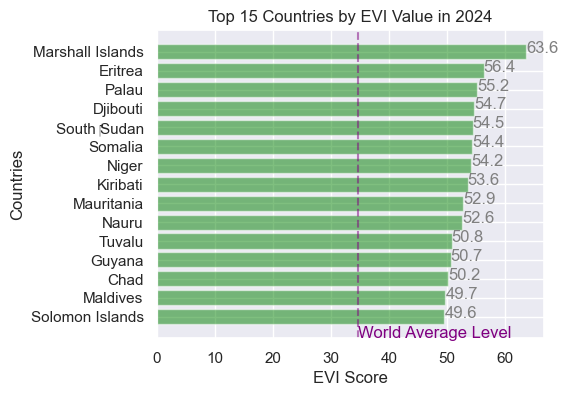

In [160]:
# Plot the horizontal bar chart with the mean EVI line
sns.set_theme() # Set Seaborn style for better aesthetics
plt.figure(figsize=(5, 4))
bars = plt.barh(df_2024_EVI_top_15['Countries\Indicators'], df_2024_EVI_top_15['EVI'], color='green', alpha=0.5)
plt.xlabel('EVI Score')
plt.ylabel('Countries')
plt.title('Top 15 Countries by EVI Value in 2024')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.axvline(evi_mean, color='purple', alpha=0.5, linestyle='--') # Draw a dashed line for the mean value
plt.text(evi_mean + 0.02, plt.gca().get_ylim()[0], 'World Average Level', color='purple')# Label the mean value

# Add EVI values on the right side of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/4, '{:.1f}'.format(width), ha='left', va='center', color='grey')

plt.show()

#### Visualization 2 
Draw the pie chart of the top 15 countries to see what is the proportion of LDC (the least developed countries) inside.

In [165]:
# First, check the unique value of the column "Status"
unique_statuses = df_2024_EVI_top_15['Status'].unique()
print(unique_statuses)

['ODC' 'LDC']


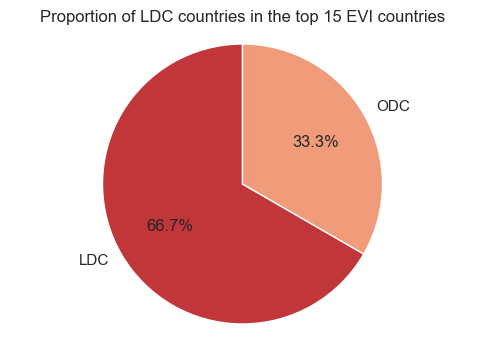

In [235]:
# Draw the pie chart to see what is the proportion of LDCs among the top 15 countries with EVI.
sns.set_style('whitegrid')
sns.set_theme() # Set Seaborn style for better aesthetics
# Count for different status
status_counts = df_2024_EVI_top_15['Status'].value_counts()
colors = sns.color_palette("RdBu")  
# Draw the pie chart
plt.figure(figsize=(6, 4))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of LDC countries in the top 15 EVI countries')
plt.axis('equal')  
plt.show()

#### Visualization 3 
Label the top 15 countries to see what is the geographical concentration of the world's highest vulnerable countries concentration and positioning

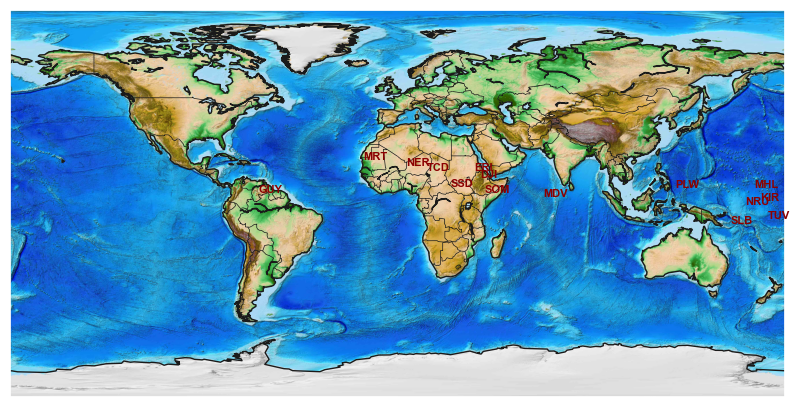

In [202]:
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
fig, ax = plt.subplots(figsize=(10, 10))
map = Basemap()
map.bluemarble()
map.etopo()
# Draw coastlines and countries
map.drawcoastlines()
map.drawcountries()

# Define ISO3 codes and their approximate geographic centers
countries_info = {
    "MHL": {"name": "Marshall Islands", "coordinates": (7.1, 171.2)},
    "ERI": {"name": "Eritrea", "coordinates": (15.3, 39.8)},
    "PLW": {"name": "Palau", "coordinates": (7.5, 134.5)},
    "DJI": {"name": "Djibouti", "coordinates": (11.8, 42.6)},
    "SSD": {"name": "South Sudan", "coordinates": (7.9, 30.0)},
    "SOM": {"name": "Somalia", "coordinates": (5.0, 46.2)},
    "NER": {"name": "Niger", "coordinates": (17.6, 9.4)},
    "KIR": {"name": "Kiribati", "coordinates": (1.4, 173.0)},
    "MRT": {"name": "Mauritania", "coordinates": (20.2, -10.3)},
    "NRU": {"name": "Nauru", "coordinates": (-0.5, 166.9)},
    "TUV": {"name": "Tuvalu", "coordinates": (-7.1, 177.1)},
    "GUY": {"name": "Guyana", "coordinates": (4.9, -58.9)},
    "TCD": {"name": "Chad", "coordinates": (15.4, 18.7)},
    "MDV": {"name": "Maldives", "coordinates": (3.2, 73.2)},
    "SLB": {"name": "Solomon Islands", "coordinates": (-9.4, 160.0)}
}

# Label countries
for iso, info in countries_info.items():
    x, y = map(info['coordinates'][1], info['coordinates'][0])
    plt.text(x, y, iso, fontsize=8, ha='center', color='darkred', weight='bold')

plt.show()

#### Visualization 4 
ODCs and LDCs EVI distributions in World Map, 2024

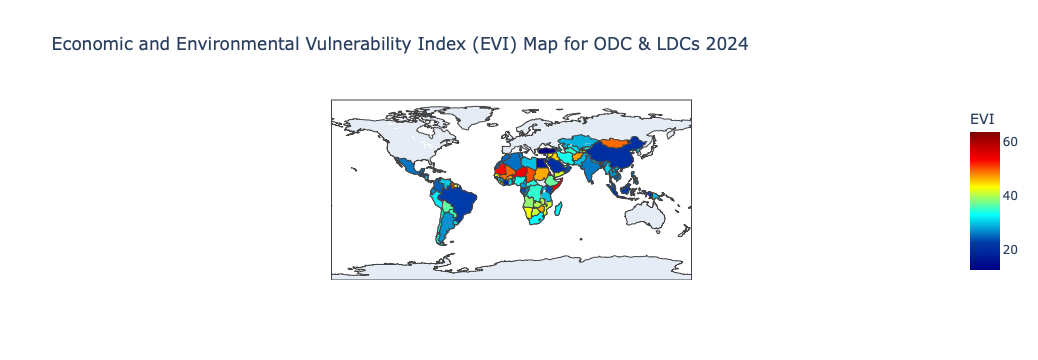

In [226]:
# Draw the distribution of all the ODC and LDCs in 2024 with EVI 
fig = px.choropleth(df_2024_EVI, 
                    locations='Countries\Indicators',
                    locationmode='country names',
                    color='EVI',
                    hover_name='Countries\Indicators',
                    color_continuous_scale='Jet', 
                    title='Economic and Environmental Vulnerability Index (EVI) Map for ODC & LDCs 2024')
fig.show()

### 2. Factors Analysis
Analyze for what are the major determinents for under high vulnerability explosure.

#### Visualization 1
Correlation matrix of the 8 factors of EVI score: For further analysis use.

## 3. Summary
My analysis reveals a clear inverse relationship between the Economic and Environmental Vulnerability Index (EVI) and the level of development of countries. Specifically, as the EVI increases, the level of development tends to decrease.
Furthermore, regions with higher EVI values exhibit distinct geographic distribution patterns. They are prominently concentrated in island nations and areas near the equatorial region in Africa. These regions display a close correlation with climate change factors, indicating a heightened vulnerability to environmental risks.
Additionally, EVI shows significant correlations with population, economic, and other factors. However, due to time constraints, further exploration of these relationships is recommended for future research endeavors.